# Exercises in Classification I

In [350]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

## Exercise 1

In this exercise, we continue from Exercise 1 and 2 from Multiple Linear Regression and look at the [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) dataset (The file "EnergyEfficiency.csv" is also on Moodle). 

Answer the following questions:
1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.
2. Calculate R-square, MAE, and RMSE on the training set
3. Calculate R-square, MAE, and RMSE on the test set
4. Does the model overfit?
5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.

In [351]:
df = pd.read_csv("EnergyEfficiency.csv")
df.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [352]:
X_df = df[["SurfaceArea"]]
X_df.head()

,SurfaceArea
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5


In [353]:
y = df["HeatingLoad"]
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: HeatingLoad, dtype: float64

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=4690)

In [355]:
X_train.head()

,SurfaceArea
207,612.5
408,686.0
520,784.0
629,563.5
440,588.0


In [356]:
y_train.head()

207    24.24
408    11.80
520    16.73
629    34.95
440    29.47
Name: HeatingLoad, dtype: float64

In [357]:
X_test.head()

,SurfaceArea
679,563.5
404,661.5
351,612.5
145,514.5
409,686.0


In [358]:
y_test.head()

679    36.57
404    35.99
351    24.94
145    24.40
409    12.03
Name: HeatingLoad, dtype: float64

In [359]:
mlr_model = linear_model.LinearRegression()

In [360]:
mlr_model.fit(X_train, y_train)

LinearRegression()

2. Calculate R-square, MAE, and RMSE on the training set

In [361]:
y_pred_train = mlr_model.predict(X_train)

In [362]:
r2_score(y_train, y_pred_train)

0.4308819066081996

In [363]:
mean_absolute_error(y_train, y_pred_train)

5.955610376186317

In [364]:
root_mean_squared_error(y_train, y_pred_train)

7.589032417608087

3. Calculate R-square, MAE, and RMSE on the test set

In [365]:
y_pred_test = mlr_model.predict(X_test)

In [366]:
r2_score(y_test, y_pred_test)

0.4376000405282835

In [367]:
mean_absolute_error(y_test, y_pred_test)

6.105734271308426

In [368]:
root_mean_squared_error(y_test, y_pred_test)

7.602613329042482

4. Does the model overfit?

The model is not overfitted, as the R2 score doesn't change significicantly between the test and train data. Likewise the MAE and RMSE is similarely close

5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

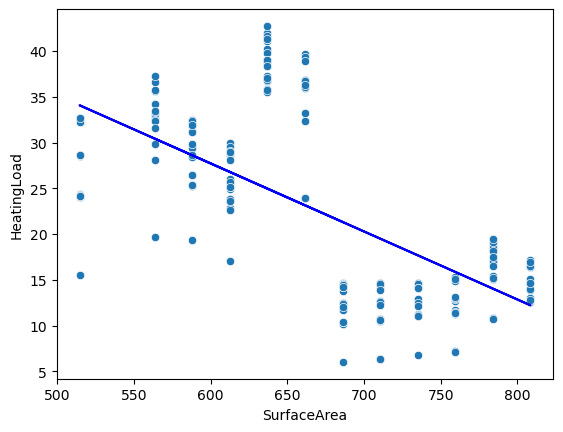

In [369]:


sns.scatterplot(x = X_test['SurfaceArea'], y = y_test)
plt.plot(X_train["SurfaceArea"], y_pred_train, color = "orange")
plt.plot(X_test["SurfaceArea"], y_pred_test, color = "blue")

plt.show()

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [370]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [371]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [372]:
df.income.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [373]:
df["income"] = df["income"].replace({"<=50K." : "<=50K", ">50K.": ">50K"})

In [374]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

In [375]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [376]:
df["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [377]:
df["native-country"] = df["native-country"].replace({"?" : None})

In [378]:
df.dropna(subset=["native-country"], inplace=True)

In [379]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [380]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [381]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47041 non-null  object
 2   fnlwgt          47985 non-null  int64 
 3   education       47985 non-null  object
 4   education-num   47985 non-null  int64 
 5   marital-status  47985 non-null  object
 6   occupation      47038 non-null  object
 7   relationship    47985 non-null  object
 8   race            47985 non-null  object
 9   sex             47985 non-null  object
 10  capital-gain    47985 non-null  int64 
 11  capital-loss    47985 non-null  int64 
 12  hours-per-week  47985 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [382]:
X_df = df[["hours-per-week","age"]]
X_df = X_df.join(pd.get_dummies(df[["native-country", "sex"]], drop_first=True, dtype=int))
X_df.head()

y = pd.get_dummies(df["income"], drop_first=True, dtype=int)
y.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=123)

4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 